[1.00000000e-03 1.34896288e-03 1.81970086e-03 2.45470892e-03
 3.31131121e-03 4.46683592e-03 6.02559586e-03 8.12830516e-03
 1.09647820e-02 1.47910839e-02 1.99526231e-02 2.69153480e-02
 3.63078055e-02 4.89778819e-02 6.60693448e-02 8.91250938e-02
 1.20226443e-01 1.62181010e-01 2.18776162e-01 2.95120923e-01
 3.98107171e-01 5.37031796e-01 7.24435960e-01 9.77237221e-01
 1.31825674e+00 1.77827941e+00 2.39883292e+00 3.23593657e+00
 4.36515832e+00 5.88843655e+00 7.94328235e+00 1.07151931e+01
 1.44543977e+01 1.94984460e+01 2.63026799e+01 3.54813389e+01
 4.78630092e+01 6.45654229e+01 8.70963590e+01 1.17489755e+02
 1.58489319e+02 2.13796209e+02 2.88403150e+02 3.89045145e+02
 5.24807460e+02 7.07945784e+02 9.54992586e+02 1.28824955e+03
 1.73780083e+03 2.34422882e+03 3.16227766e+03 4.26579519e+03
 5.75439937e+03 7.76247117e+03 1.04712855e+04 1.41253754e+04
 1.90546072e+04 2.57039578e+04 3.46736850e+04 4.67735141e+04
 6.30957344e+04 8.51138038e+04 1.14815362e+05 1.54881662e+05
 2.08929613e+05 2.818382

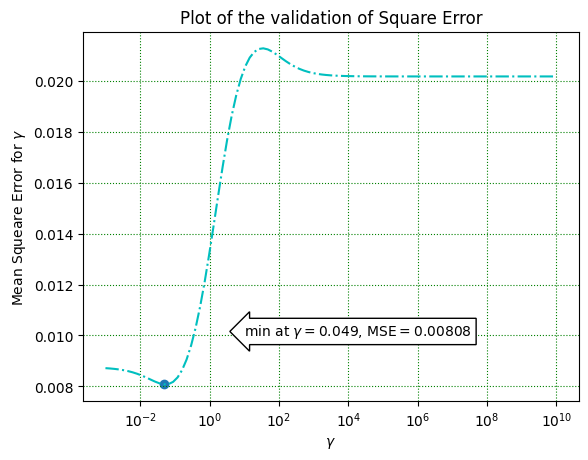

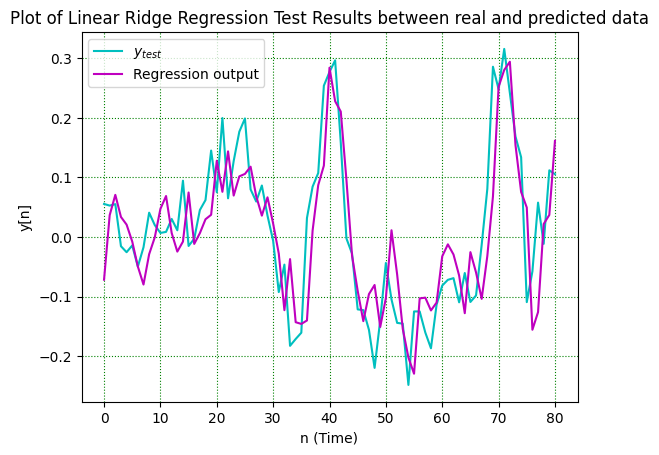

In [ ]:
import numpy as np
from numpy.linalg import inv

class RidgeReg:
	def __init__(self, gamma):
		self.gamma_ = gamma

	def fit(self, X, y):
		# append 1 to end of each row for bias
		X = np.append(X,np.ones((len(X),1)),axis=1)
		# calculate the K (kernel) matrix
		K = np.matmul(X.T,X)
		p = np.matmul(X.T,y)
		# calculate the weights
		self.w_ = np.matmul(inv(K+self.gamma_*np.eye(len(K))), p)
		return self

	def predict(self, X):
		X = np.append(X,np.ones((len(X),1)),axis=1)
		y_pred = np.matmul(self.w_.T,X.T)
		return y_pred

	def score(self, X, y):
		ypred = self.predict(X)
		e = y - ypred
		# return negative error so it works with grid search
		return -np.dot(e,e)/len(y)

	def set_params(self, **params):
		self.gamma_ = params["gamma"]
		return self

	def get_params(self,deep=False):
		return {"gamma":self.gamma_}

import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import matplotlib.font_manager as font_manager
import matplotlib as mpl

# Add every font at the specified location
font_dir = ['/Library/Fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

# Set font family globally
mpl.rcParams['font.family'] = 'SF Pro Text'



# read the data file
df = pd.read_csv("data.csv", header=None)

#
# break the data file up into components as numpy arrays
#
#ftest = df.iloc[:,0].to_numpy()
#ftrain = df.iloc[:,1].to_numpy()
Xtest = df.iloc[:,2:21].to_numpy()
Xtrain = df.iloc[:,21:40].to_numpy()
ytest = df.iloc[:,40].to_numpy()
ytrain = df.iloc[:,41].to_numpy()

# vary gamma from 10^-2 to 10^1
gammas=10**np.linspace(-3,10,101)
print(gammas)
# use grid search to find best gamma
param_grid = {'gamma': gammas}
clf = GridSearchCV(RidgeReg(gamma='auto'), param_grid, cv=5)
clf = clf.fit(Xtrain, ytrain)


# get the scores and find the gamma with smallest error
scores = -clf.cv_results_['mean_test_score'];
print(scores)
be2 = np.inf
sindex = 0
for i in range(len(scores)):
	if scores[i] < be2:
		be2 = scores[i]
		sindex = i
bgamma=gammas[sindex]
print(bgamma)
print(scores)
# now test it against the full test set
yhat = clf.predict(Xtest)
print(yhat)
e2 = -clf.score(Xtest, ytest)
print(be2)

# plot the gamma search
plt.plot(gammas,scores,label="Error", color='c', linestyle="-.")
plt.scatter([bgamma],[be2])
plt.xlabel("$\gamma$")
plt.ylabel("Mean Squeare Error for $\gamma$")
plt.xscale(value="log")
plt.grid(True, which='both', color='g', linestyle=':' )
plt.annotate("min at $\gamma=%.3f$, MSE$=%.3g$"%(bgamma,be2),xy=(10,0.01), bbox=dict(boxstyle ="larrow", fc ="1"))
plt.title("Plot of the validation of Square Error")
# plt.title("min at $\gamma=%.3f$, MSE$=%.3g$"%(bgamma,be2),fontsize=10)
plt.show()

# plot real vs. predicted
time = list(range(0,len(yhat)))
plt.plot(time,ytest,label="$y_{test}$", color='c')
plt.plot(time,yhat,label="Regression output", color='m')
plt.xlabel("n (Time)")
plt.ylabel("y[n]")
plt.grid(True, which='both', color='g', linestyle=':')
plt.legend()
plt.title("Plot of Linear Ridge Regression Test Results between real and predicted data")  # Real vs. Predicted
# plt.title("$\gamma=%.3f$,MSE$=%.3g$"%(bgamma,e2),fontsize=10)
plt.show()

10
[[-1.1158583  -1.11618134 -1.12202106 -1.1225523  -1.05107859 -1.23015106
  -1.22544737]
 [-1.00771433 -1.00518708 -0.98673424 -0.96586649 -0.94498552 -1.18528671
  -1.22544737]
 [-0.19122232 -0.19282893 -0.20485551 -0.27085375 -0.5305808  -1.06898535
  -1.22544737]
 [ 0.13137275  0.13557523  0.17129427  0.18543553 -0.06965215 -1.1569964
  -1.22544737]
 [-0.19393759 -0.18858519 -0.17346621 -0.19279293 -0.0077256  -1.1569964
  -1.22544737]
 [-1.38545807 -1.38500884 -1.33586945 -1.26865126 -0.0344916  -1.1569964
  -1.22544737]]


NameError: ignored

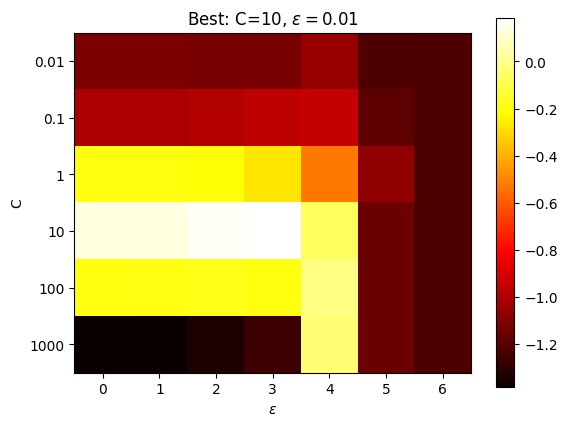

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import svm
from time import time
from sklearn.model_selection import GridSearchCV

# values for grid search
C_values = [0.01, 0.1, 1, 10, 100, 1000]
eps_values = [0.0005, 0.001, 0.005, 0.01, 0.1, 0.25, 0.5]
nu_values =[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

# set to True for SVR
# set to False for NuSVR
svr=True

if svr:
	Classifier = svm.SVR
	cname = "SVR"
	param_grid = {'C': C_values,
              'epsilon': eps_values }
else:
	Classifier = svm.NuSVR
	cname = "NuSVR"
	param_grid = {'C': C_values,
              'nu': nu_values }

# read the data file
df = pd.read_csv("data.csv", header=None)

#
# break the data file up into components as numpy arrays
#
#ftest = df.iloc[:,0].to_numpy()
#ftrain = df.iloc[:,1].to_numpy()
Xtest = df.iloc[:,2:21].to_numpy().T
Xtrain = df.iloc[:,21:40].to_numpy().T
ytest = df.iloc[:,40].to_numpy()
ytrain = df.iloc[:,41].to_numpy()

# fit the classifier to training data
clf = GridSearchCV(Classifier(gamma='auto'), param_grid, cv=5)
clf = clf.fit(Xtrain.T, ytrain)

# extract scores and best parameters
scores = clf.cv_results_['mean_test_score'];
C = clf.best_estimator_.get_params()["C"]
print(C)

if svr:
 scores = scores.reshape(len(C_values),len(eps_values))
 print(scores)
 epsilon = clf.best_estimator_.get_params()["epsilon"]
else:
	nu = clf.best_estimator_.get_params()["nu"]
	scores = scores.reshape(len(C_values),len(nu_values))

plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.ylabel('C')
#plt.figure(figsize=(8, 6))
#plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)

if svr:
	plt.xlabel(r"$\epsilon$")
	plt.title("Best: C=%d, $\epsilon=%.3g$"%(C, epsilon))
else:
	plt.xlabel(r"$\nu$")
	plt.title(r"Best: C=%d, $\nu=%.3g$"%(C, nu))

plt.colorbar()
plt.yticks(np.arange(len(C_values)), C_values)

if svr:
 plt.plot(eps_values, ev, color="c")
 plt.scatter([C],[epsilon])
 plt.xlabel("$\epsilon$")
 plt.ylabel("Mean Squeare Error for $\epsilon$")
 plt.xscale(value="log")
 plt.grid(True, which='both', color='g', linestyle=':' )
 plt.title("Optimal: C=%d, $\epsilon=%.3g$"%(C, epsilon))
 plt.xticks(np.arange(len(eps_values)), eps_values)
else:
 plt.plot(nu_values, scores[3,:], color="c")
 plt.xlabel("\u03BD")
 plt.ylabel("Mean Squeare Error for \u03BD")
 plt.xscale(value="log")
 plt.grid(True, which='both', color='g', linestyle=':' )
 plt.title("Optimal: C=%d, \u03BD=%.3g"%(C, nu))
 plt.xticks(np.arange(len(nu_values)), nu_values)

plt.suptitle('{} Grid Search Score'.format(cname))
plt.show()

yhat = clf.predict(Xtest.T)
e = ytest - yhat
e2 = np.dot(e,e)/len(ytest)
print(e2)

trange = list(range(0,len(yhat)))
plt.plot(trange,ytest,label="$y_{test}$", color='c')
plt.plot(trange,yhat,label='Regression output'.format(cname), color='m')
plt.xlabel("n (Time)")
plt.ylabel("y[n]")
plt.grid(True, which='both', color='g', linestyle=':')
plt.legend()

if svr:
	plt.title("Plot of Linear Ridge Regression using \u03BD-SVR".format(cname))
else:
	plt.title(r"C=%d, $\nu=%.3g, e^2=%.3g$"%(C, nu, e2))
plt.show()


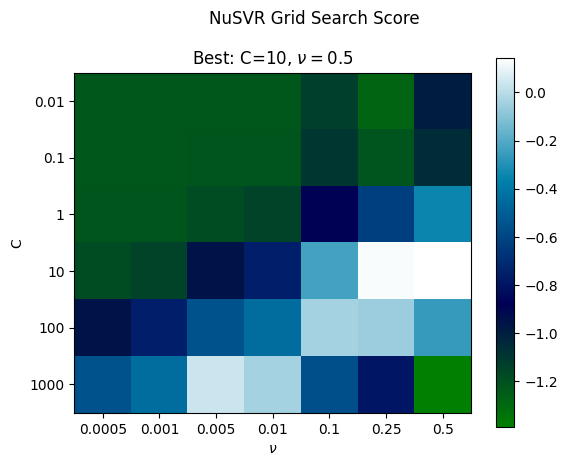

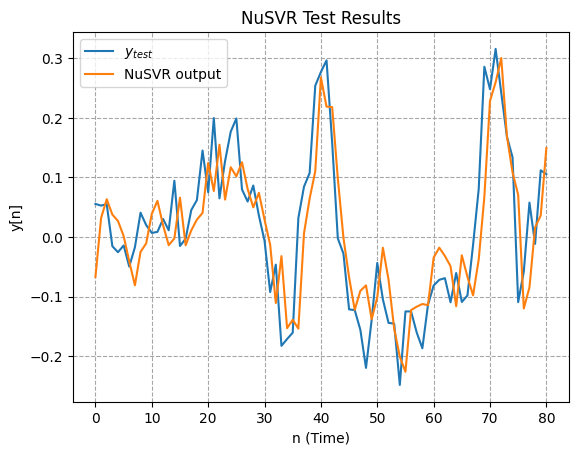

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import svm
from time import time
from sklearn.model_selection import GridSearchCV

# values for grid search
C_values = [0.01, 0.1, 1, 10, 100, 1000]
eps_values = [0.0005, 0.001, 0.005, 0.01, 0.1, 0.25, 0.5]
nu_values =[0.0005, 0.001, 0.005, 0.01, 0.1, 0.25, 0.5]
# set to True for SVR
# set to False for NuSVR
svr=False

if svr:
	Classifier = svm.SVR
	cname = "SVR"
	param_grid = {'C': C_values,
              'epsilon': eps_values }
else:
	Classifier = svm.NuSVR
	cname = "NuSVR"
	param_grid = {'C': C_values,
              'nu': nu_values }

# read the data file
df = pd.read_csv("data.csv", header=None)

#
# break the data file up into components as numpy arrays
#
#ftest = df.iloc[:,0].to_numpy()
#ftrain = df.iloc[:,1].to_numpy()
Xtest = df.iloc[:,2:21].to_numpy().T
Xtrain = df.iloc[:,21:40].to_numpy().T
ytest = df.iloc[:,40].to_numpy()
ytrain = df.iloc[:,41].to_numpy()

# fit the classifier to training data
clf = GridSearchCV(Classifier(gamma='auto'), param_grid, cv=5)
clf = clf.fit(Xtrain.T, ytrain)

# extract scores and best parameters
scores = clf.cv_results_['mean_test_score'];
C = clf.best_estimator_.get_params()["C"]
if svr:
	scores = scores.reshape(len(C_values),len(eps_values))
	epsilon = clf.best_estimator_.get_params()["epsilon"]
else:
	nu = clf.best_estimator_.get_params()["nu"]
	scores = scores.reshape(len(C_values),len(nu_values))

#plt.figure(figsize=(8, 6))
#plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.get_cmap('ocean'))
plt.ylabel('C')

if svr:
	plt.xlabel(r"$\epsilon$")
	plt.title("Best: C=%d, $\epsilon=%.3g$"%(C, epsilon))
else:
	plt.xlabel(r"$\nu$")
	plt.title(r"Best: C=%d, $\nu=%.3g$"%(C, nu))

plt.colorbar()
plt.yticks(np.arange(len(C_values)), C_values)
if svr:
	plt.xticks(np.arange(len(eps_values)), eps_values)
else:
	plt.xticks(np.arange(len(nu_values)), nu_values)

plt.suptitle('{} Grid Search Score'.format(cname))
plt.show()

yhat = clf.predict(Xtest.T)
e = ytest - yhat
e2 = np.dot(e,e)/len(ytest)

trange = list(range(0,len(yhat)))
plt.plot(trange,ytest,label="$y_{test}$")
plt.plot(trange,yhat,label='{} output'.format(cname))
plt.xlabel("n (Time)")
plt.ylabel("y[n]")
plt.grid(True, which='both', color='0.65', linestyle='--')
plt.legend()
plt.title("{} Test Results".format(cname))
# if svr:
# 	plt.title("C=%d, $\epsilon=%.3g, e^2=%.3g$"%(C, epsilon, e2))
# else:
# 	plt.title(r"C=%d, $\nu=%.3g, e^2=%.3g$"%(C, nu, e2))
plt.show()